<a href="https://colab.research.google.com/github/ShinjiNeo/Test_ML/blob/main/Template_Regression_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template della Regressione A - EDA


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Librerie **necessarie**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools import dfSummary


import warnings
warnings.filterwarnings('ignore')


- da installare

In [ ]:
!pip install jupyter-summarytools -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.1 MB/s eta 0:00:00


## Dataset

In [ ]:
df

ID  Superficie  Numero di stanze  Età della casa  Distanza dal centro  \
0      1       152.0               5.0              20                  NaN   
1      2       142.0               5.0              33                  7.0   
2      3        64.0               2.0              20                 14.0   
3      4       156.0               2.0              49                 15.0   
4      5       121.0               3.0              12                  NaN   
..   ...         ...               ...             ...                  ...   
495  496        76.0               3.0              47                 18.0   
496  497       171.0               3.0              32                 12.0   
497  498        54.0               3.0              10                  6.0   
498  499        78.0               5.0              16                 13.0   
499  500       132.0               4.0               7                 16.0   

       Tipo di casa  Piscina    Prezzo  
0             Villa        0  215359.0  
1             Villa        0  166707.0  
2    Casa a schiera        1  351351.0  
3             Villa        0  338511.0  
4      Appartamento        1  335718.0  
..              ...      ...       ...  
495           Villa        0  250158.0  
496           Villa        0  423494.0  
497           Villa        1  433569.0  
498           Villa        0  448264.0  
499  Casa a schiera        0       NaN  

[500 rows x 8 columns]

## Caricamento Dataset e modifica delle colonne

In [ ]:
# path=""
# df=pd.read_csv(path) #Attenzione possibili separatori (sep=',' sep=';' sep='\t')

FileNotFoundError: [Errno 2] No such file or directory: ''

In [ ]:
# Nel caso dobbiamo cambiare nome alle colonne
# df.columns = ['', '',]
# df

In [ ]:
df1=df.copy()

## Visualizzazione del dataset

- tipo di variabili

In [ ]:
df1.info()

In [ ]:
df1.describe().T

In [ ]:
dfSummary(df1)

- conteggio valori nulli

In [ ]:
df1.isnull().sum()

ID                      0
Superficie             50
Numero di stanze       50
Età della casa          0
Distanza dal centro    50
Tipo di casa            0
Piscina                 0
Prezzo                 50
dtype: int64

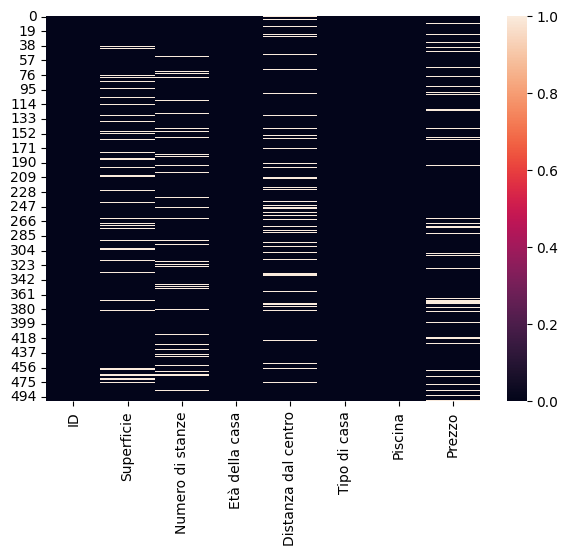

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df1.isnull(),);

- gestione separata dei valori nulli

In [ ]:
df1['']=df1[''].interpolate() # Attenzione all'interpolate, può falsare di molto i dati soprattutto in regressione creando relazioni che non esistono
df1['']

0      152.0
1      142.0
2       64.0
3      156.0
4      121.0
       ...  
495     76.0
496    171.0
497     54.0
498     78.0
499    132.0
Name: Superficie, Length: 500, dtype: float64

In [ ]:
df1['']=df1[''].fillna(df1[''].mean()) # Attenzione anche alla media, anch'essa può falsare i dati
df1['']

0      5.0
1      5.0
2      2.0
3      2.0
4      3.0
      ... 
495    3.0
496    3.0
497    3.0
498    5.0
499    4.0
Name: Numero di stanze, Length: 500, dtype: float64

ultimo valore null rimasto, l'ho droppato direttamente

In [ ]:
df1=df1.dropna()

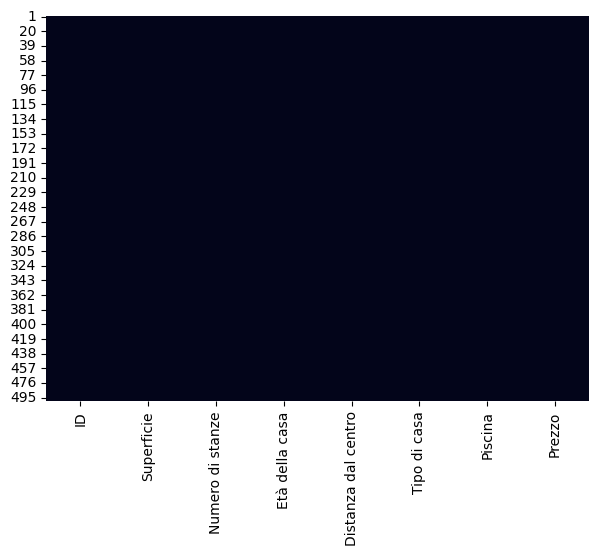

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df1.isnull(),cbar=False);

- droppiamo le colonne che non ci servono:

In [ ]:
df1=df1.drop([''], axis=1)


- Altro modo per separarle prima dei grafici

In [ ]:
# define numeric and categorical columns
num_col = df.describe().columns.tolist()
all_col = df.columns.tolist()
obj_col = [i for i in all_col if i not in num_col]



## Grafici per vedere relazioni

- possibile altra visualizzazione

In [ ]:
# def viz(df,types):
#     num = df
#     f = pd.melt(num, value_vars=num)
#     g = sns.FacetGrid(f, col="variable",  col_wrap=3,
#                       sharex=False, sharey=False)
#     g = g.map(types, "value")
#     plt.show()
#     return (g)
# # histogram visualization
# viz(df[num_col], sns.distplot)


- passiamo ora alla visualizzazione grafica delle possibili relazioni

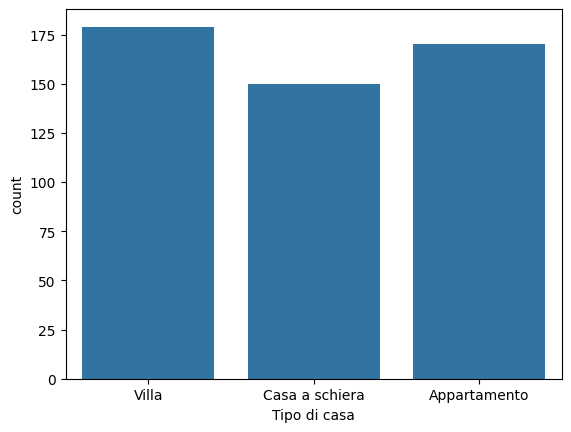

In [ ]:
sns.countplot(x='', data=df1);

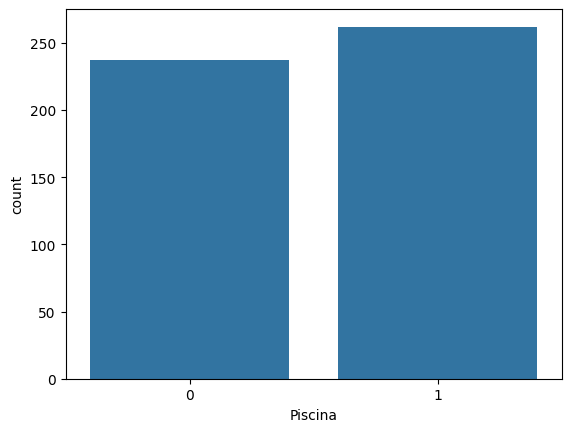

In [ ]:
sns.countplot(x='Piscina',data=df1);

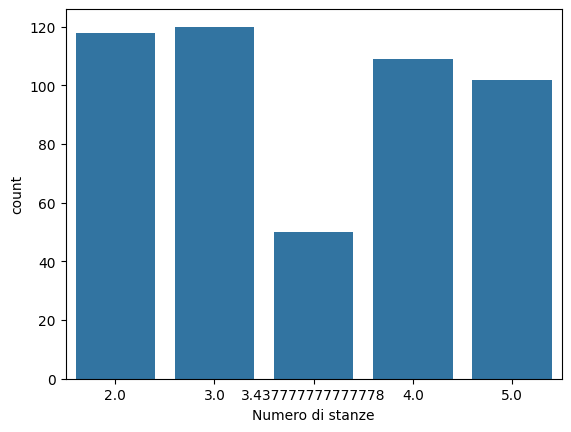

In [ ]:
sns.countplot(x='Numero di stanze',data=df1);

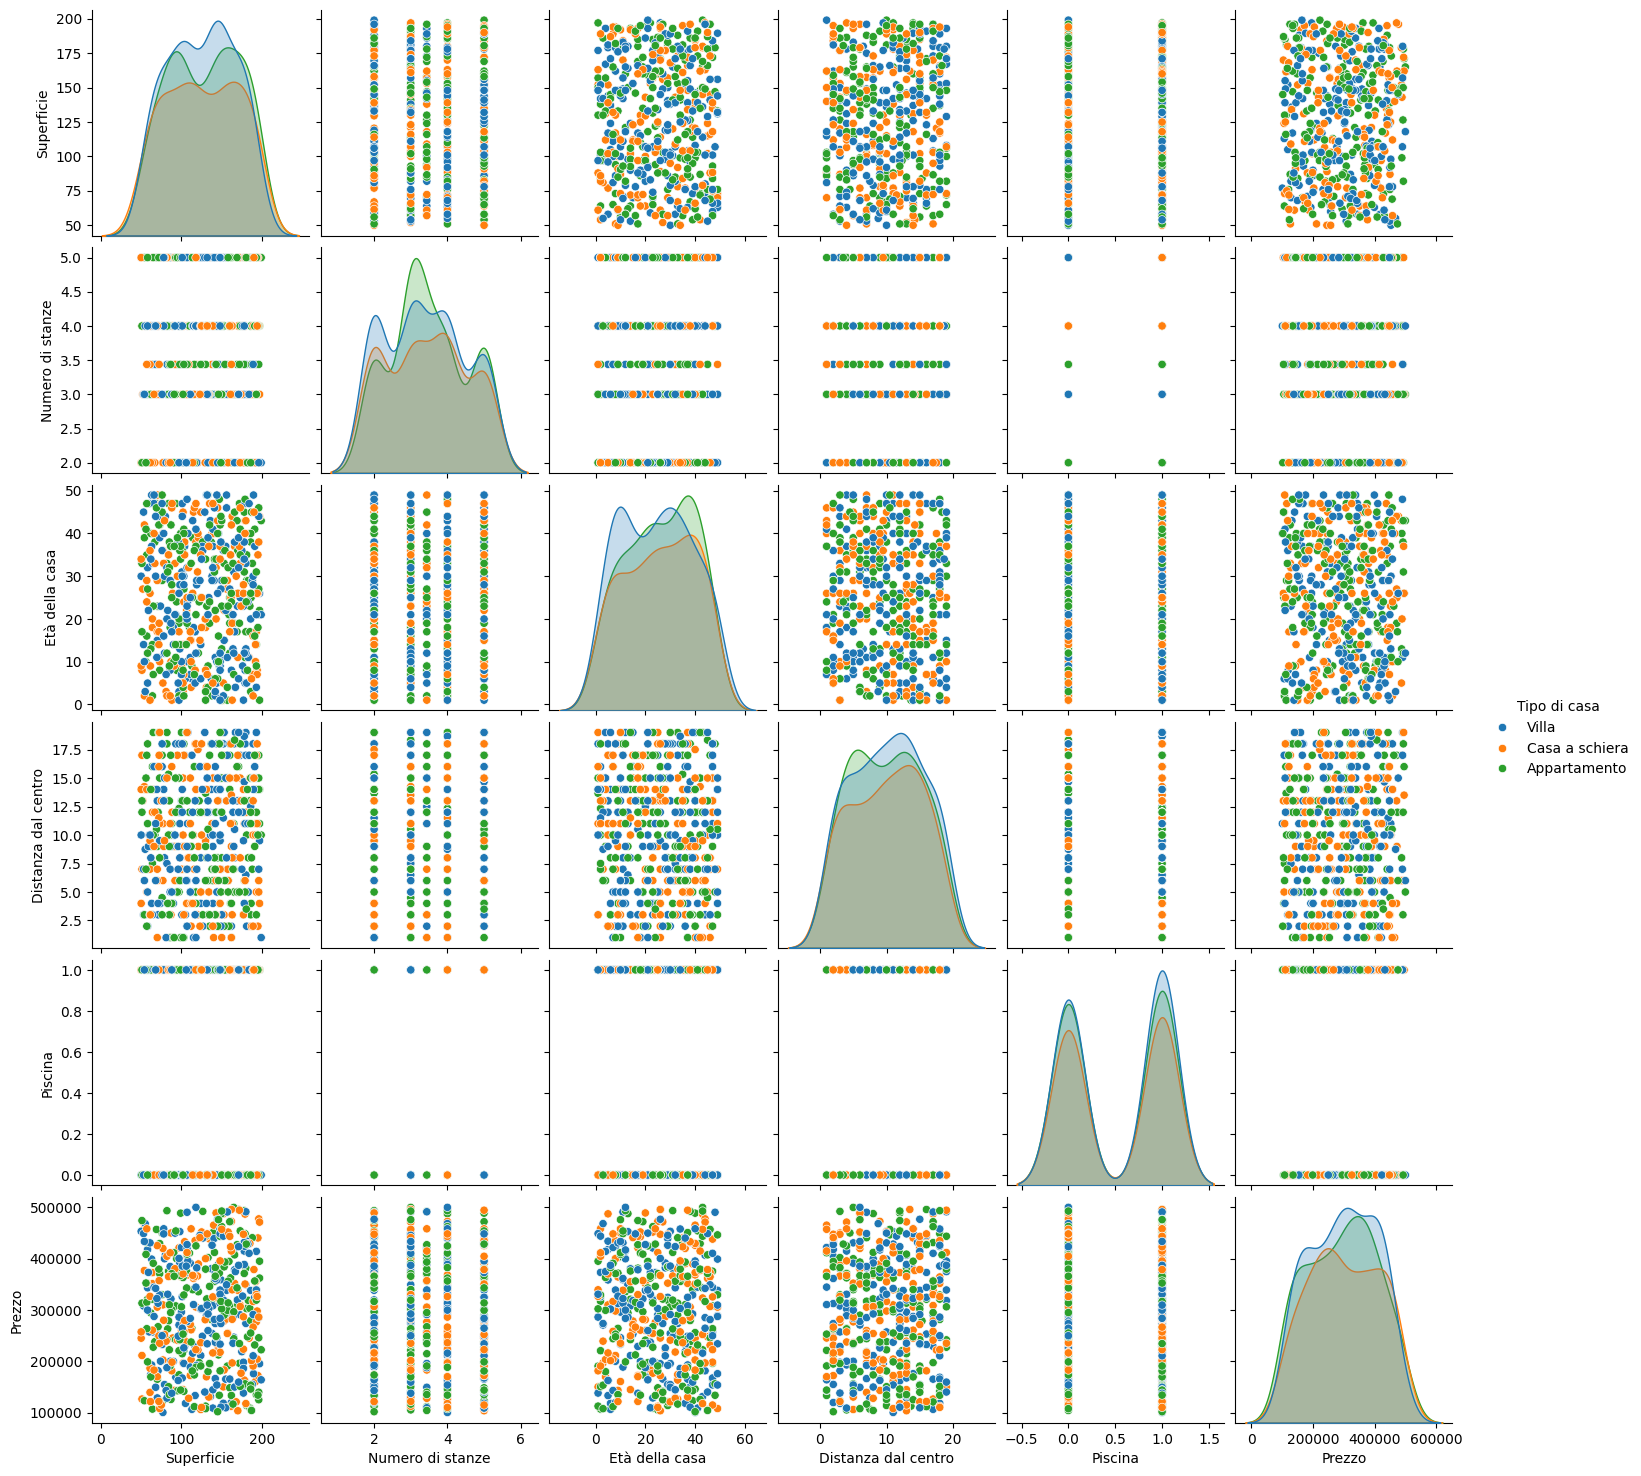

In [ ]:
sns.pairplot(df1, hue='Tipo di casa');

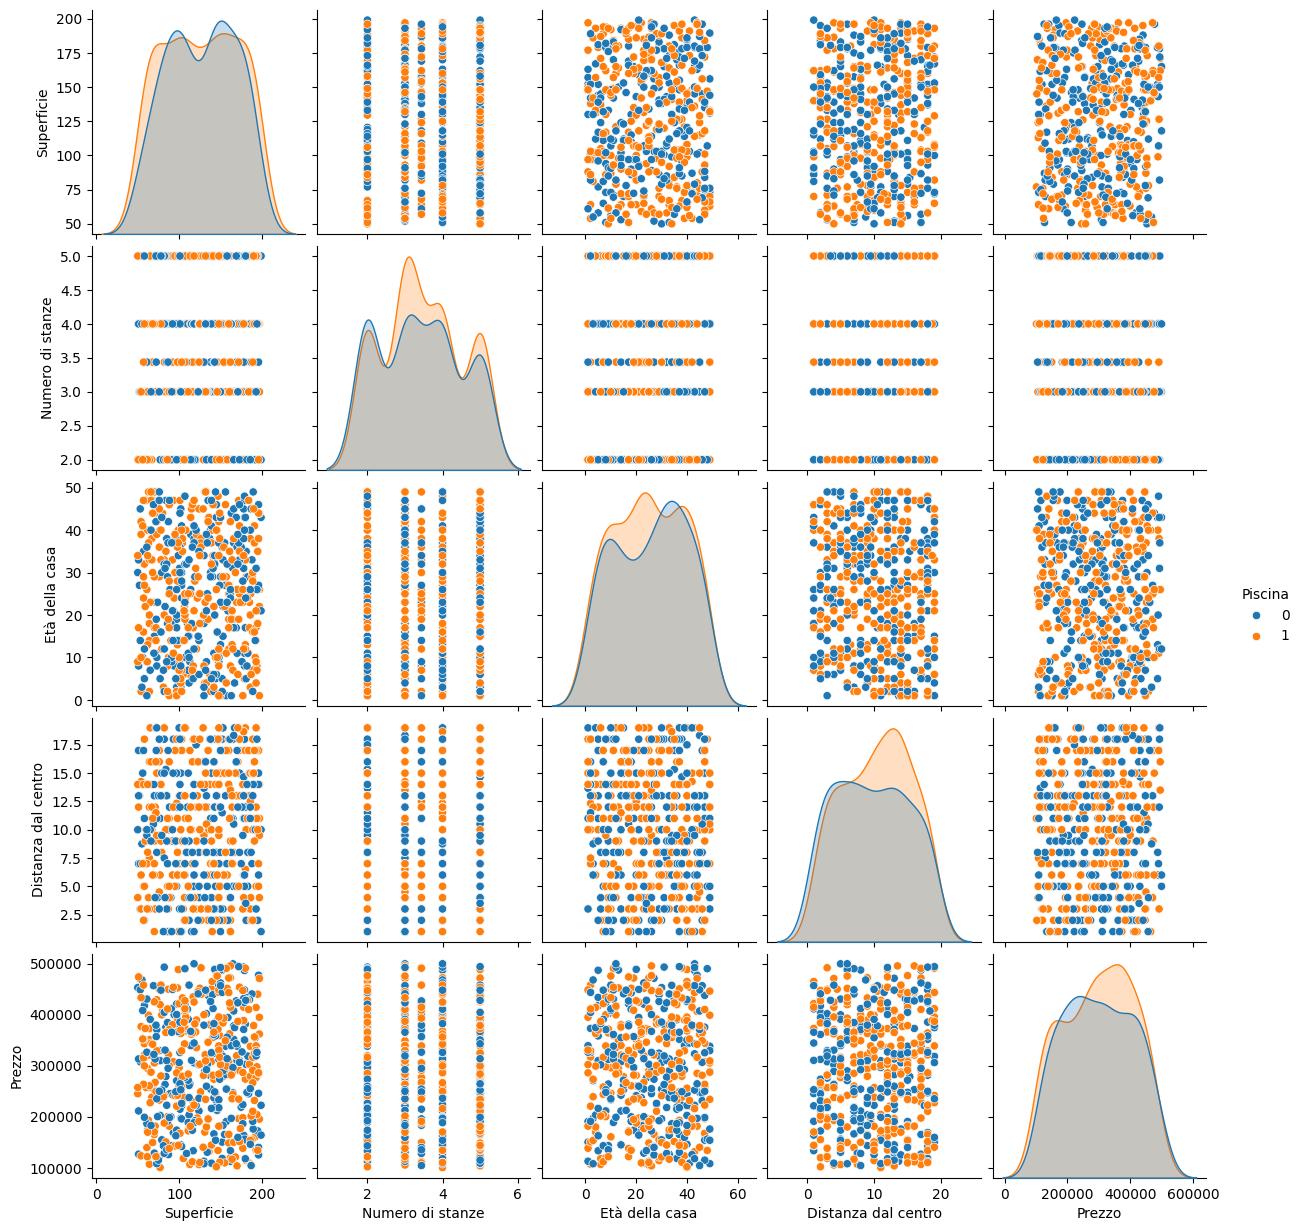

In [ ]:
sns.pairplot(df1, hue='Piscina');

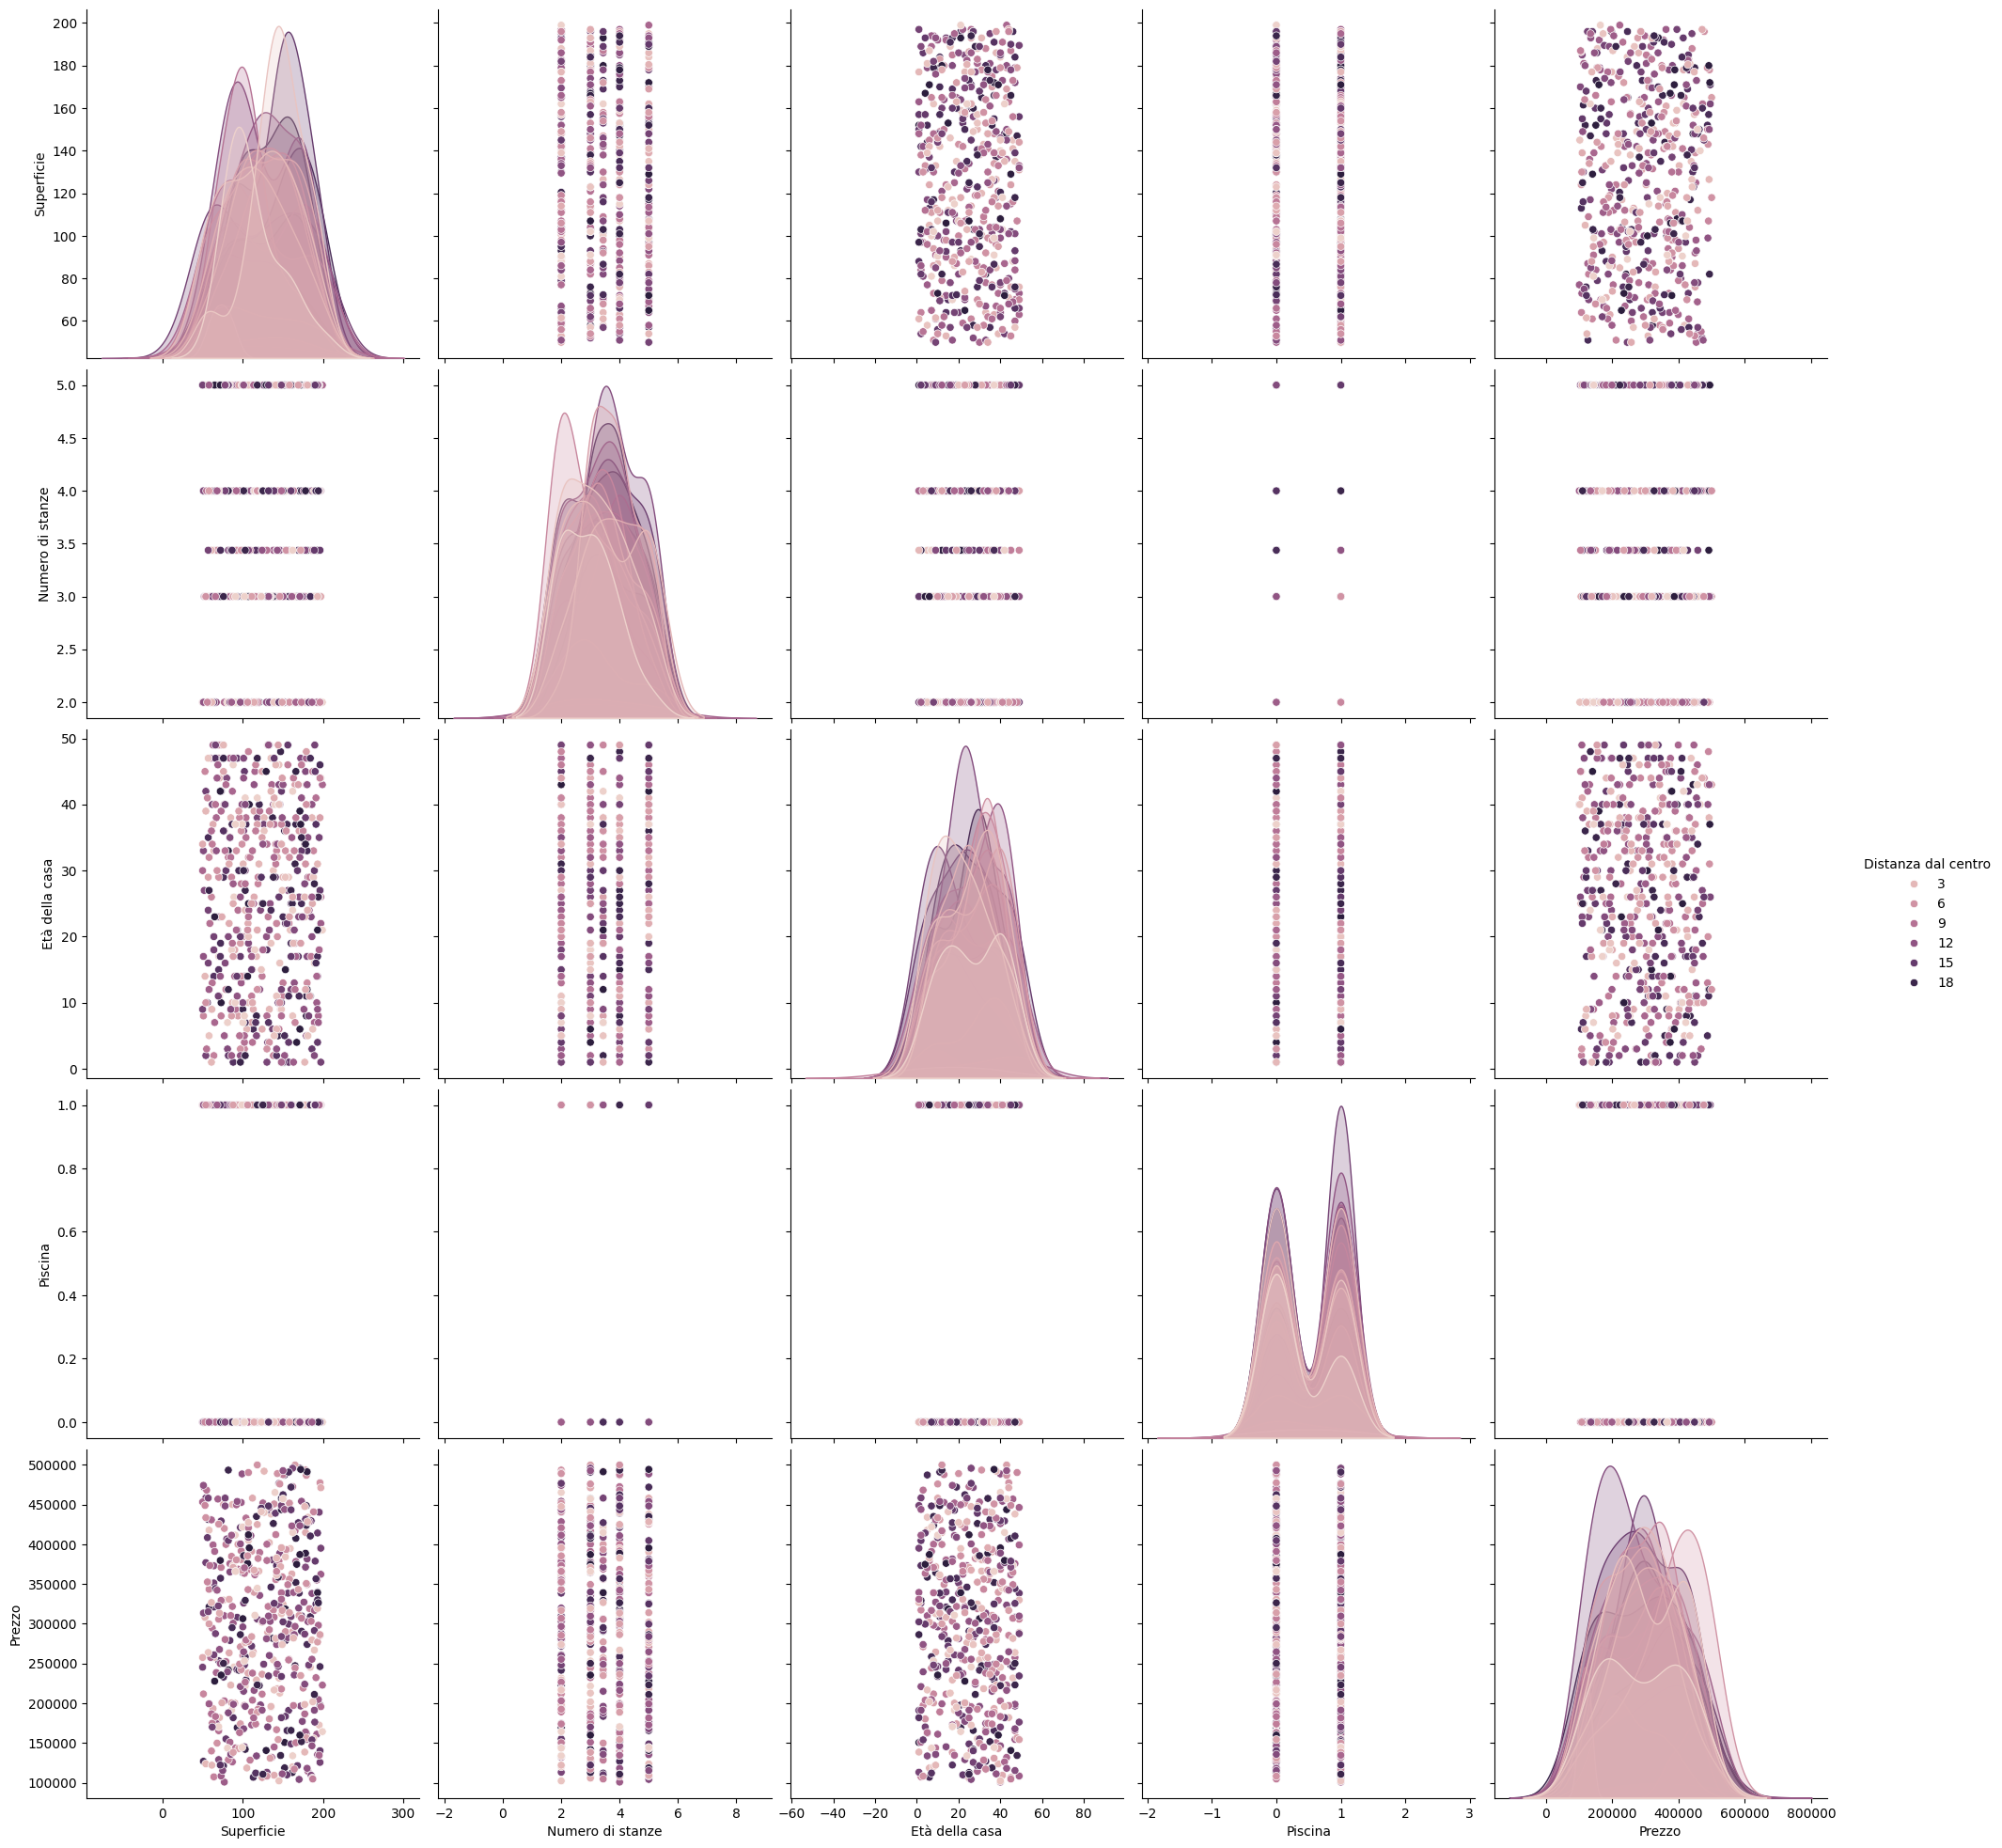

In [ ]:
sns.pairplot(df1,height=4,hue='Distanza dal centro');

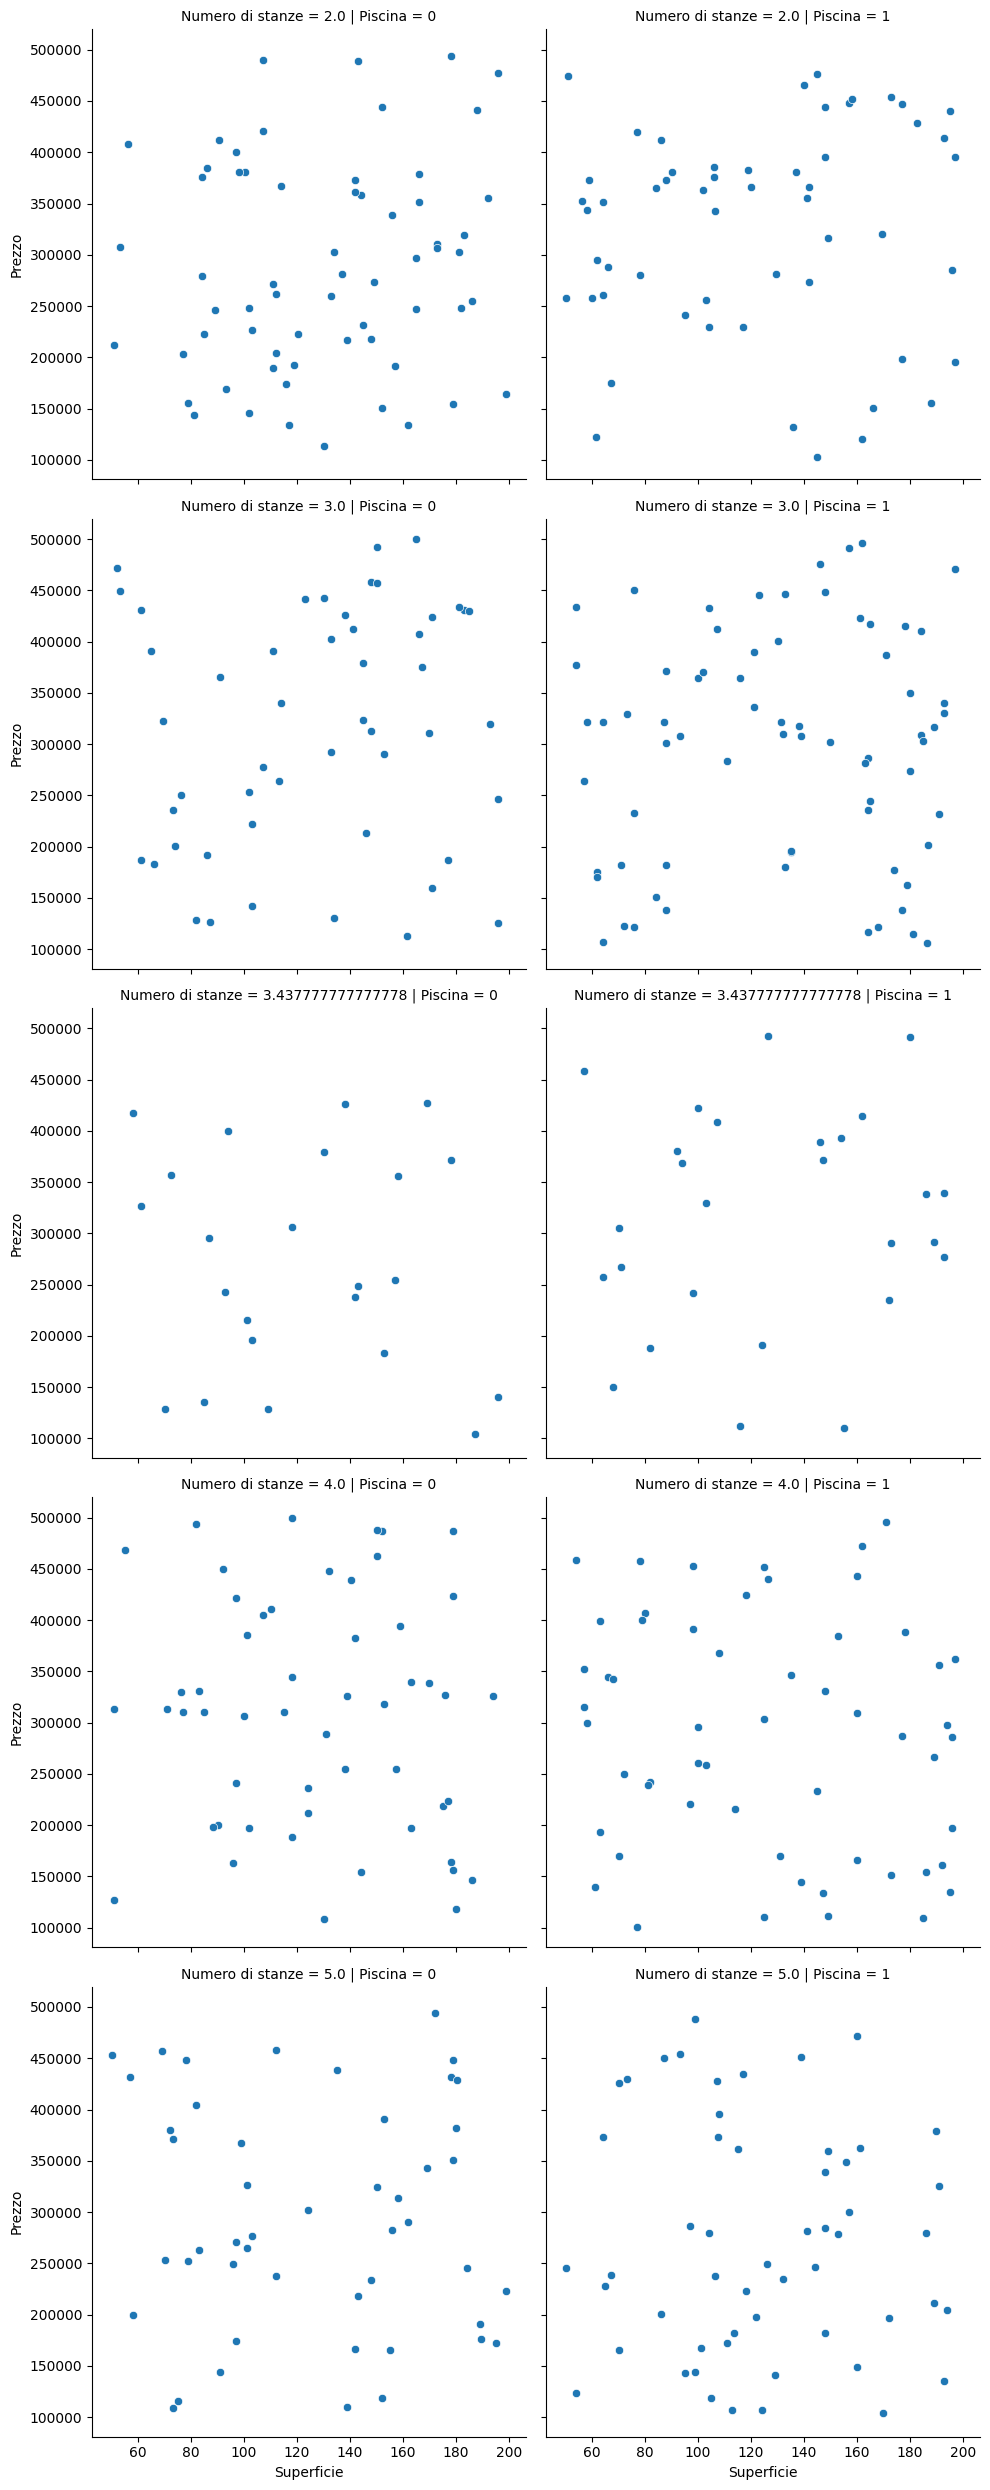

In [ ]:
sns.relplot(x="Superficie", y="Prezzo",
                col="Piscina", row="Numero di stanze", data=df1);

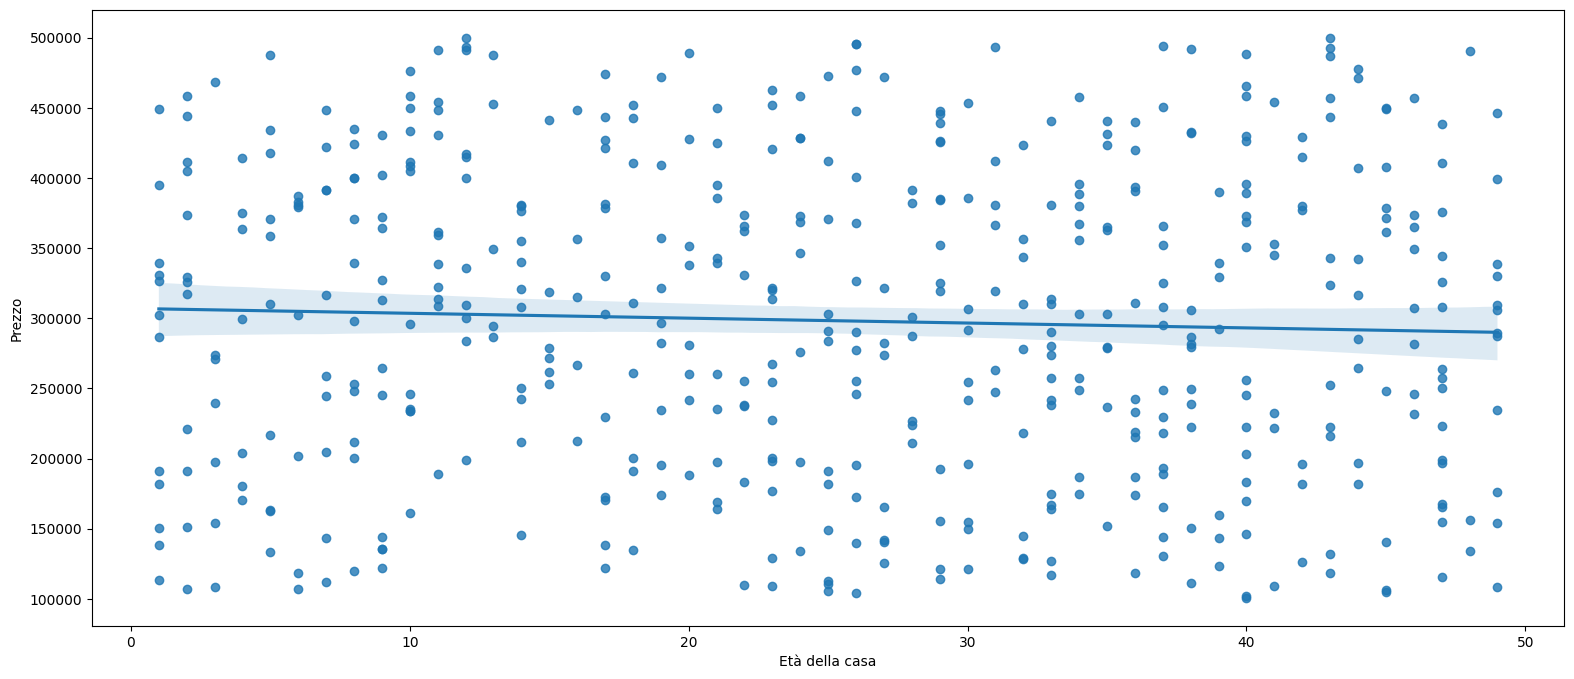

In [ ]:
plt.figure(figsize=(19,8))
sns.regplot(x="Età della casa", y="Prezzo", data=df1);

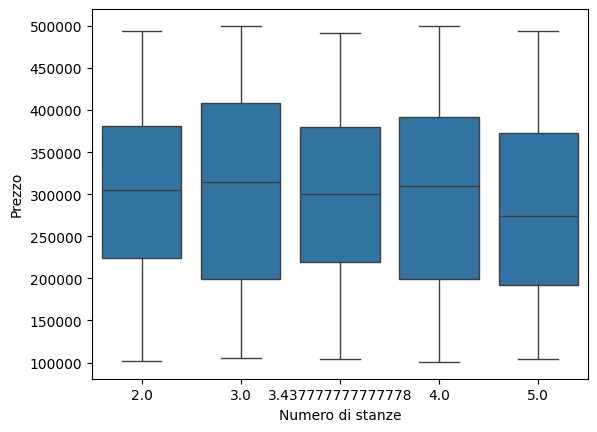

In [ ]:
sns.boxplot(x="Numero di stanze", y="Prezzo", data=df1);

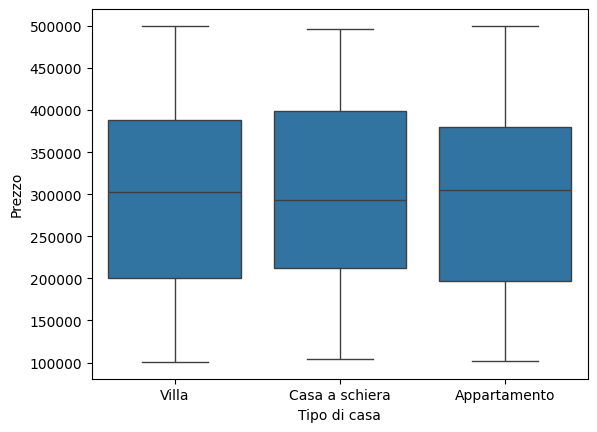

In [ ]:
sns.boxplot(x="Tipo di casa", y="Prezzo", data=df1);

## Correlazione

In [ ]:
corr=df1.corr(numeric_only=True)
corr

Superficie  Numero di stanze  Età della casa  \
Superficie             1.000000         -0.017009        0.002185   
Numero di stanze      -0.017009          1.000000        0.048374   
Età della casa         0.002185          0.048374        1.000000   
Distanza dal centro    0.059818          0.076564       -0.043339   
Piscina               -0.016593          0.026530       -0.021155   
Prezzo                 0.008065         -0.065582       -0.044298   

                     Distanza dal centro   Piscina    Prezzo  
Superficie                      0.059818 -0.016593  0.008065  
Numero di stanze                0.076564  0.026530 -0.065582  
Età della casa                 -0.043339 -0.021155 -0.044298  
Distanza dal centro             1.000000  0.069103  0.005057  
Piscina                         0.069103  1.000000 -0.001029  
Prezzo                          0.005057 -0.001029  1.000000

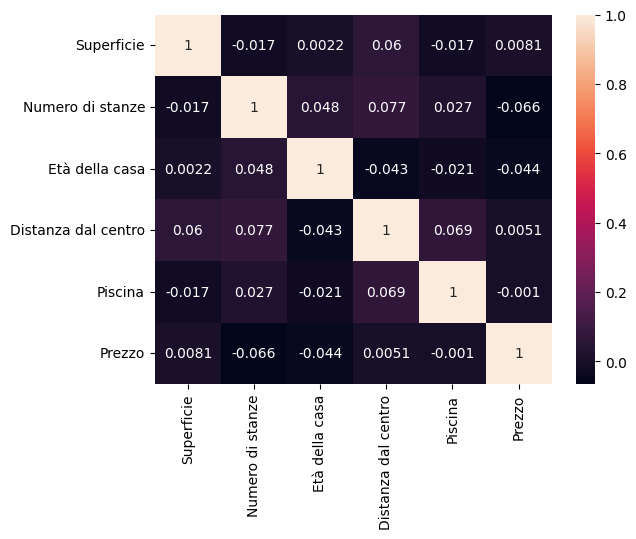

In [ ]:
sns.heatmap(corr,annot=True);

## Standardizzazione e Normalizzazione

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# arr_scaled = scaler.fit_transform(df)

# print(arr_scaled)

# df_scaled = pd.DataFrame(arr_scaled, columns=df.columns,index=df.index)
# df_scaled

## Test modelli

- Target e Features

In [ ]:
df2 = df1.copy()
TARGET=
X_ = df2[['', '']] # matrice delle features
y = df2[TARGET]                 # array target

- standardizzo

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
standardized_data = sc.fit_transform(X_)

X = standardized_data
X

array([[ 0.36572452,  1.49058901,  0.54446373, -0.57925806],
       [-1.4609973 , -1.36612588, -0.38182429,  0.75320713],
       [ 0.69359767, -1.36612588,  1.68451054,  0.9435593 ],
       ...,
       [-1.69519241, -0.41388759, -1.09435354, -0.76961023],
       [-1.13312416,  1.49058901, -0.66683599,  0.56285496],
       [ 0.13152942,  0.53835071, -1.30811232,  1.13391147]])

- Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=667,
                                                    )

- Provo prima un modello


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # regression problem

model.fit(X_train,y_train)



LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([283687.24390971, 295880.20388781, 296821.54841832, 294185.2184924 ,
       290383.01905677, 286479.45313277, 281609.48261196, 300977.10249358,
       305585.00578285, 299095.94225782, 296262.93391087, 296744.27541018,
       289760.81797633, 305865.55093978, 284739.15952151, 305563.92207005,
       304029.69011897, 305133.17045555, 289215.11896894, 282184.30119163,
       306914.35164177, 300633.16918788, 302767.28889858, 295429.36360616,
       302406.97732599, 304057.47163335, 285010.42749147, 293928.63173008,
       299153.33248204, 292514.93750835, 279624.11614782, 282907.97389008,
       279926.53738154, 284399.22824292, 295523.14055311, 289774.15870519,
       289309.67021081, 295394.27179566, 286890.51459414, 301161.49747456,
       296011.33588837, 299151.99774437, 281614.09991956, 304464.95744044,
       301080.18059593, 296240.72207204, 298544.51800974, 300100.17771431,
       291825.66905862, 298147.74312336, 290984.4419439 , 301498.31384334,
       290315.98193127, 2

- Grafico tra i valori reali e quelli predetti

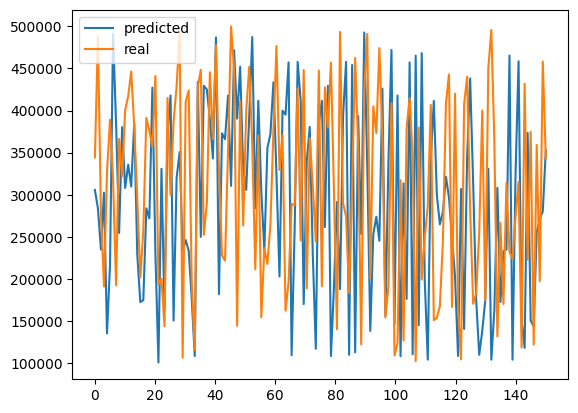

In [ ]:
x_ = np.linspace(0,y_test.shape[0],y_test.shape[0])

plt.plot(x_,y_pred,label='predicted')
plt.plot(x_,y_test,label='real')
plt.legend()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,root_mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
ad_r2score = 1-(1-r2score)*(len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)

print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2_score: ', r2score)
print('Adjusted_R2_score: ', ad_r2score)

MAE:  101355.21087515545
MSE:  13227419715.654436
RMSE:  115010.52002166773
R2_score:  -0.03300973410223218
Adjusted_R2_score:  -0.06150655435332819


In [ ]:
model.coef_ # as b1, b2, b3, b4

array([-1968.88038717, -2762.2335371 , -2495.99763354, -6579.52543714])

In [ ]:
model.intercept_ # as b0

np.float64(293699.42520461447)

In [ ]:
# formula regressione b0+b1*30+b2*3

- Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5,scoring='r2')
scores

array([-0.03929464, -0.01512864, -0.06415706, -0.01230441, -0.01218119])

## Test altri modelli


In [ ]:
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regressors =   [XGBRegressor(),
                SVR(),
                ElasticNet(),
                KNeighborsRegressor(),
                LinearRegression(),
                GradientBoostingRegressor(),
                RandomForestRegressor(),
                DecisionTreeRegressor(),
                ]

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

metrics_dict = {'ModelName': [], 'R2Score': [], 'RMSE': [], 'MSE': [], 'MAE': []}

# Loop through each regressor
for reg in regressors:
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    model_name = type(reg).__name__
    metrics_dict['ModelName'].append(model_name)
    metrics_dict['R2Score'].append(r2_score(y_test, y_pred))
    metrics_dict['RMSE'].append(mean_squared_error(y_test, y_pred,))
    metrics_dict['MSE'].append(mean_squared_error(y_test, y_pred))
    metrics_dict['MAE'].append(mean_absolute_error(y_test, y_pred))

# Create DataFrame
metrics_df = pd.DataFrame(metrics_dict).set_index('ModelName').sort_values('R2Score', ascending=False)
metrics_df

R2Score          RMSE           MSE            MAE
ModelName                                                                     
SVR                       -0.009315  1.292402e+10  1.292402e+10  100008.915656
ElasticNet                -0.026907  1.314927e+10  1.314927e+10  100983.222670
LinearRegression          -0.033010  1.322742e+10  1.322742e+10  101355.210875
RandomForestRegressor     -0.122395  1.437197e+10  1.437197e+10  102609.365506
KNeighborsRegressor       -0.151093  1.473945e+10  1.473945e+10  104001.511889
GradientBoostingRegressor -0.183076  1.514898e+10  1.514898e+10  104699.718994
XGBRegressor              -0.226738  1.570806e+10  1.570806e+10  103750.047083
DecisionTreeRegressor     -0.825006  2.336872e+10  2.336872e+10  127334.907222

**r2score varia da -1 e 1 e dice quanto il modello è buono. In questo caso i migliori, tra i peggiori, sono i primi 3 perché sono più vicini allo 0, gli altri essendo più vicini al -1 sono la merda**


- best fit per miglior modello

In [ ]:
dtr = DecisionTreeRegressor(random_state=667)
param_grid = {
    'max_depth': [3, 5, 10, None],  # Profondità massima dell'albero
    'min_samples_split': [2, 5, 10],  # Numero minimo di campioni per dividere un nodo
    'min_samples_leaf': [1, 2, 4],  # Numero minimo di campioni per essere una foglia
    'max_features': ['auto', 'sqrt', 'log2', None]  # Numero massimo di caratteristiche da considerare
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search_dtr = GridSearchCV(estimator=dtr,
                               param_grid=param_grid,
                               cv=5,
                               n_jobs=-1,
                               verbose=2)

<p align="center">
**Questi valori sono poi da mettere in PIPE**</p>



In [ ]:
%%time
grid_search_dtr.fit(X_train, y_train)
grid_search_dtr.best_params_

Fitting 5 folds for each of 144 candidates, totalling 720 fits
CPU times: user 346 ms, sys: 22.9 ms, total: 369 ms
Wall time: 4.85 s


{'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [ ]:
best_model = grid_search_dtr.best_estimator_
print("Performance del modello sui dati di test:", best_model.score(X_test, y_test))


Performance del modello sui dati di test: -0.11323978178768557




---

IL PROF HA UTILIZZATO UN ALTRO MODELLO CON ALTRI PARAMETRI

---




In [ ]:
param_grid = {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 0.5],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10]
            }

gbr = GradientBoostingRegressor(random_state=667)
grid_search_gbr = GridSearchCV(estimator=gbr,
                               param_grid=param_grid,
                               cv=5,
                               n_jobs=-1,
                               verbose=2)




- trovo i migliori parametri

In [ ]:
%%time
grid_search_gbr.fit(X_train, y_train)
grid_search_gbr.best_params_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
CPU times: user 1.22 s, sys: 92.7 ms, total: 1.32 s
Wall time: 37.9 s


{'learning_rate': 0.01,
 'max_depth': 5,
 'min_samples_split': 5,
 'n_estimators': 50}

- vedo di quanto migliora il modello con i best parameters

In [ ]:
best_model = grid_search_gbr.best_estimator_
print("Performance del modello sui dati di test:", best_model.score(X_test, y_test))

Performance del modello sui dati di test: -0.02603557757397934


## Esportazione del modello

- importo joblib

In [ ]:
import joblib

joblib.dump(model,'')

- carico il modello

In [ ]:
loaded_model = joblib.load('lr_boston.pkl') #aggiungo il nome del modello con l'estensione .pkl
loaded_model

- faccio inferenza

In [ ]:
loaded_model.predict([[]])[0] # aggiungo il numero di parametri per la predizione